In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
path1 = 'heart.csv'
path2 = 'o2Saturation.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2,names=["o2Saturation"])

In [ ]:
df = df1.merge(df2, left_index=True, right_index=True)
df.head(7)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.6
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,98.1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,97.5
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,97.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trtbps        303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalachh      303 non-null    int64  
 8   exng          303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    int64  
 11  caa           303 non-null    int64  
 12  thall         303 non-null    int64  
 13  output        303 non-null    int64  
 14  o2Saturation  303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 37.9 KB


# **2) Data Preparation**

**Get columns names**

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'o2Saturation'],
      dtype='object')

**Change some columns names**

In [ ]:
df.rename(columns={"cp": "chest_pain",
                   "trtbps":"blood_pressure",
                   "chol":"cholestoral",
                   "fbs":"fasting_blood_sugar",
                   "thalachh":"max_heart_rate",
                   "exng":"angina",
                   "caa": "n_vessels",
                   "output":"heart_attack"},
          inplace=True)

df['sex'].replace({0:'Female', 1:'Male'}, inplace=True)

li = df.columns.tolist()
li[0],li[1],li[-2],li[-1] = li[1],li[0],li[-1],li[-2]
df = df[li]

df.head()

,sex,age,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slp,n_vessels,thall,o2Saturation,heart_attack
0,Male,63,3,145,233,1,0,150,0,2.3,0,0,1,98.6,1
1,Male,37,2,130,250,0,1,187,0,3.5,0,0,2,98.6,1
2,Female,41,1,130,204,0,0,172,0,1.4,2,0,2,98.6,1
3,Male,56,1,120,236,0,1,178,0,0.8,2,0,2,98.6,1
4,Female,57,0,120,354,0,1,163,1,0.6,2,0,2,98.1,1


**Summary statistics**

In [ ]:
con_cols = ['age','blood_pressure','cholestoral','max_heart_rate','o2Saturation']
df[con_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
o2Saturation,303.0,97.484488,0.352649,96.5,97.5,97.5,97.5,98.6


# **3) Exploratory Data Analysis**

**Count plot of categorical features**

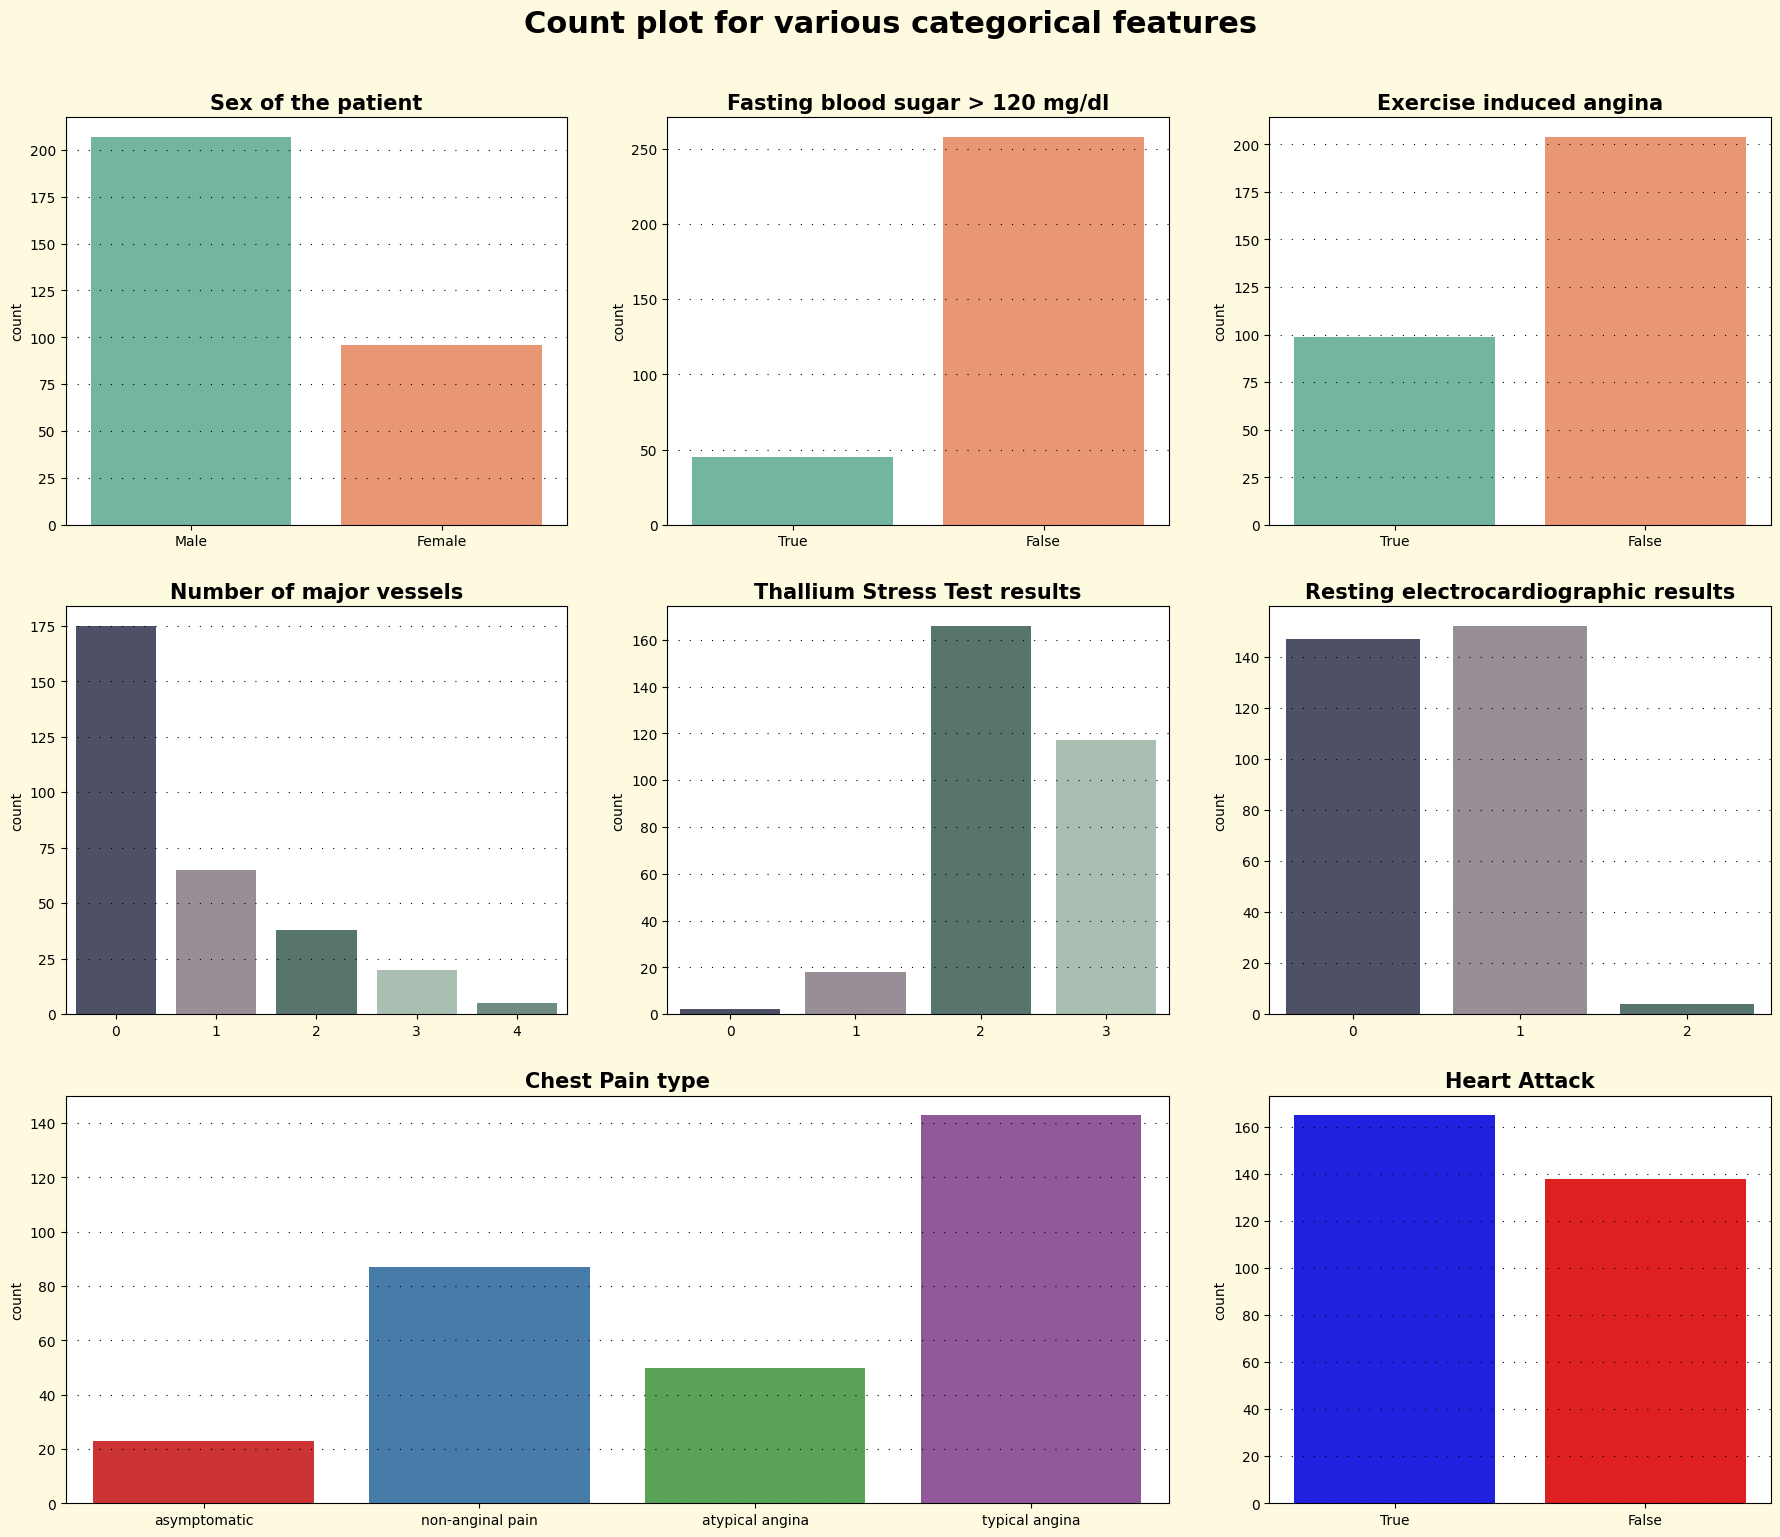

In [ ]:
fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,:-1])
ax8 = fig.add_subplot(gs[2,2])

fig.suptitle(t='Count plot for various categorical features',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")
color_platte = ['#4a4e69','#9a8c98','#52796f','#a4c3b2','#6b9080']

# Sex
ax1.set_title('Sex of the patient',fontweight ="bold",fontsize=15)
ax1.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax1,data=df,x='sex',palette = 'Set2')
ax1.set_xlabel("")



# fasting blood sugar
ax2.set_title('Fasting blood sugar > 120 mg/dl',fontweight ="bold",fontsize=15)
ax2.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax2,data=df,x='fasting_blood_sugar',order=[True,False],palette = 'Set2')
ax2.set_xlabel("")

# angina
ax3.set_title('Exercise induced angina',fontweight ="bold",fontsize=15)
ax3.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax3,data=df,x='angina',order=[True, False],palette = 'Set2')
ax3.set_xlabel("")

# numbers of vessels
ax4.set_title('Number of major vessels',fontweight ="bold",fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax4,data=df,x='n_vessels',palette = color_platte)
ax4.set_xlabel("")

# thall
ax5.set_title('Thallium Stress Test results',fontweight ="bold",fontsize=15)
ax5.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax5,data=df,x='thall',palette = color_platte)
ax5.set_xlabel("")

# restecg
ax6.set_title('Resting electrocardiographic results',fontweight ="bold",fontsize=15)
ax6.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax6,data=df,x='restecg',palette = color_platte)
ax6.set_xlabel("")

# chest pain
leges = {0: 'typical angina',1: 'atypical angina',2: 'non-anginal pain',3: 'asymptomatic'}
ax7.set_title('Chest Pain type',fontweight ="bold",fontsize=15)
ax7.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax7,data=df.assign(chest_pain = df['chest_pain'].replace(leges)),x='chest_pain',palette = 'Set1')
ax7.set_xlabel("")

# Heart Attack
ax8.set_title('Heart Attack',fontweight ="bold",fontsize=15)
ax8.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax8,data=df,x='heart_attack',order=[True, False],palette = ['blue','red'])
ax8.set_xlabel("")
plt.show()

**Distribution of continuous features according to target variable**

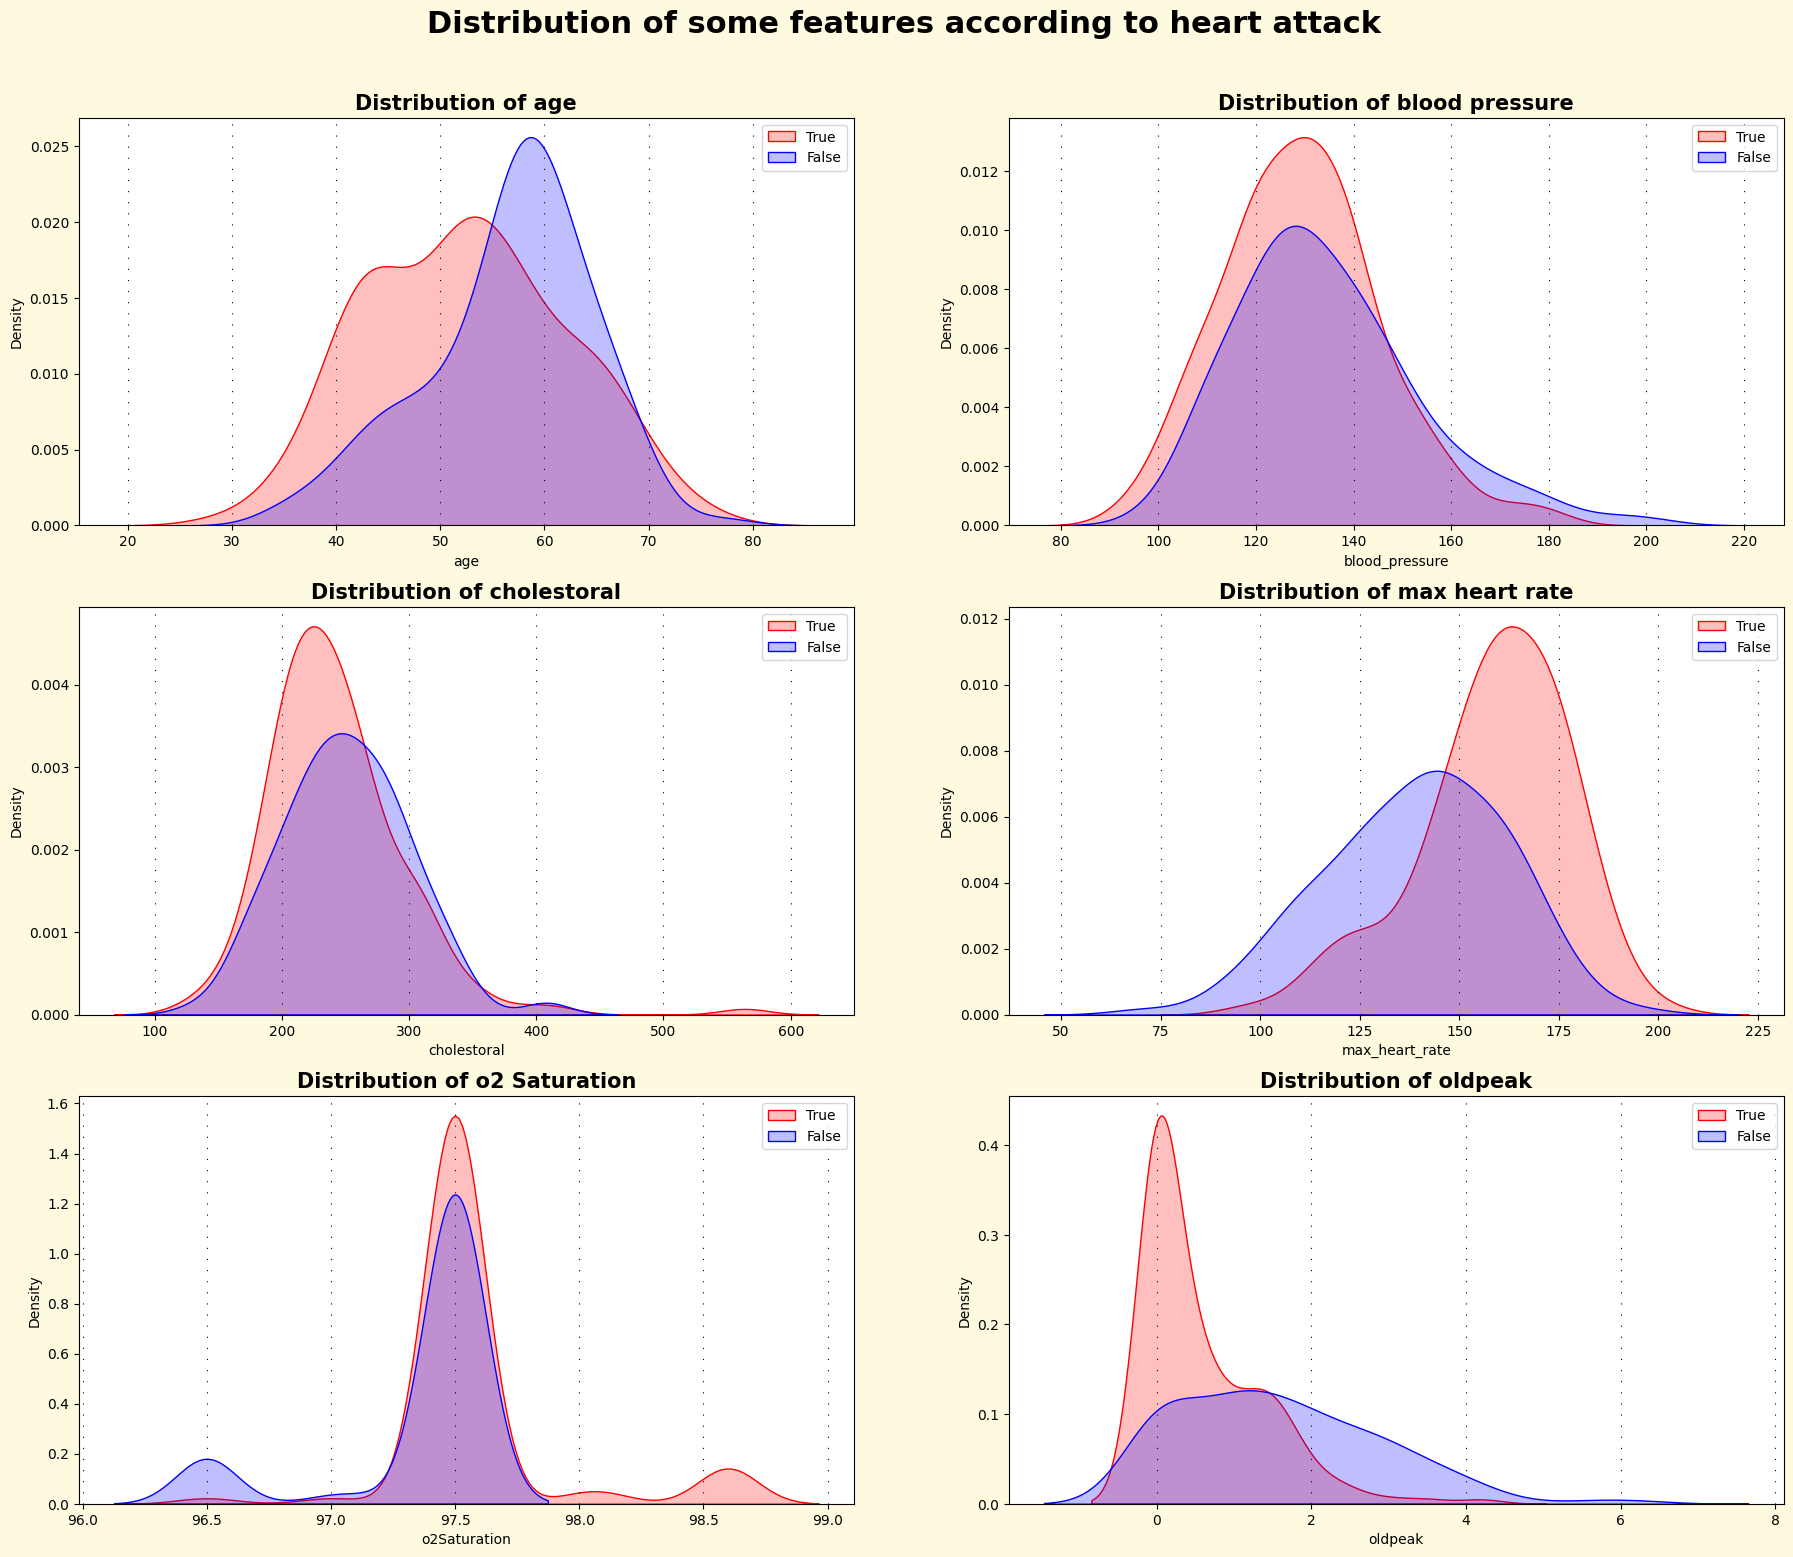

In [ ]:
fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])


fig.suptitle(t='Distribution of some features according to heart attack',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")
color_platte = ['#4a4e69','#9a8c98','#52796f','#a4c3b2','#6b9080']

# age
ax1.set_title('Distribution of age',fontweight ="bold",fontsize=15)
ax1.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax1,data=df,x='age', hue='heart_attack', fill=True, palette = ['blue','red'])
ax1.legend([True, False])

# blood_pressure
ax2.set_title('Distribution of blood pressure',fontweight ="bold",fontsize=15)
ax2.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax2,data=df,x='blood_pressure', hue='heart_attack', fill=True, palette = ['blue','red'])
ax2.legend([True, False])

# cholestoral
ax3.set_title('Distribution of cholestoral',fontweight ="bold",fontsize=15)
ax3.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax3,data=df,x='cholestoral', hue='heart_attack', fill=True, palette = ['blue','red'])
ax3.legend([True, False])

# blood_pressure
ax4.set_title('Distribution of max heart rate',fontweight ="bold",fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax4,data=df,x='max_heart_rate', hue='heart_attack', fill=True, palette = ['blue','red'])
ax4.legend([True, False])

# o2Saturation
ax5.set_title('Distribution of o2 Saturation',fontweight ="bold",fontsize=15)
ax5.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax5,data=df,x='o2Saturation', hue='heart_attack', fill=True, palette = ['blue','red'])
ax5.legend([True, False])

# oldpeak
ax6.set_title('Distribution of oldpeak',fontweight ="bold",fontsize=15)
ax6.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax6,data=df,x='oldpeak', hue='heart_attack', fill=True, palette = ['blue','red'])
ax6.legend([True, False])

plt.show()

**Correlation between features and heart attack**

In [ ]:
df_corr = df.assign(sex = df['sex'].replace({'Female':0, 'Male':1})).corr()
df_corr['heart_attack']

sex                   -0.280937
age                   -0.225439
chest_pain             0.433798
blood_pressure        -0.144931
cholestoral           -0.085239
fasting_blood_sugar   -0.028046
restecg                0.137230
max_heart_rate         0.421741
angina                -0.436757
oldpeak               -0.430696
slp                    0.345877
n_vessels             -0.391724
thall                 -0.344029
o2Saturation           0.313584
heart_attack           1.000000
Name: heart_attack, dtype: float64

# **4) Modeling**

In [ ]:
# Scaling
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import classification_report, accuracy_score

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC

**Split data to 80% train data & 20% test data randomly (to build & evaluate Model)**

In [ ]:
X = df.assign(sex = df['sex'].replace({'Female':0, 'Male':1})).drop('heart_attack', axis=1)
y = df['heart_attack']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

**Preview of the first 7 rows of train data**

In [ ]:
x_train.merge(y_train,left_index=True,right_index=True).head(7)

,sex,age,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slp,n_vessels,thall,o2Saturation,heart_attack
132,1,42,1,120,295,0,1,162,0,0.0,2,0,2,97.5,1
202,1,58,0,150,270,0,0,111,1,0.8,2,0,3,97.5,0
196,1,46,2,150,231,0,1,147,0,3.6,1,0,2,97.5,0
75,0,55,1,135,250,0,0,161,0,1.4,1,0,2,97.5,1
176,1,60,0,117,230,1,1,160,1,1.4,2,2,3,97.5,0
59,0,57,0,128,303,0,0,159,0,0.0,2,1,2,97.5,1
93,0,54,1,132,288,1,0,159,1,0.0,2,1,2,97.5,1


**Preview of the first 7 rows of test data**

In [ ]:
 x_test.merge(y_test,left_index=True,right_index=True).head(7)

,sex,age,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slp,n_vessels,thall,o2Saturation,heart_attack
179,1,57,0,150,276,0,0,112,1,0.6,1,1,1,97.5,0
228,1,59,3,170,288,0,0,159,0,0.2,1,0,3,97.5,0
111,1,57,2,150,126,1,1,173,0,0.2,2,1,3,97.5,1
246,0,56,0,134,409,0,0,150,1,1.9,1,2,3,97.5,0
60,0,71,2,110,265,1,0,130,0,0.0,2,1,2,97.5,1
9,1,57,2,150,168,0,1,174,0,1.6,2,0,2,97.5,1
119,0,46,0,138,243,0,0,152,1,0.0,1,0,2,97.5,1


**Build Model (Support Vector Machines)**

In [ ]:
param_grid = {
    'random_state': [0],
    'C': [0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

svc = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

mdl = make_pipeline(StandardScaler(), svc)

mdl.fit(x_train,y_train)
y_pred = mdl.predict(x_test)
svc.best_estimator_

SVC(C=1, random_state=0)

# **5) Validation**

**get classification report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        29
           1       1.00      0.88      0.93        32

    accuracy                           0.93        61
   macro avg       0.94      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



**Evaluated Score Train DataSet by Model**

In [ ]:
print('Score TrainDataSet: ',mdl.score(x_train,y_train))

Score TrainDataSet:  0.9421487603305785


**Evaluated Score Test DataSet by Model**

In [ ]:
print('Score TestDataSet: ',mdl.score(x_test,y_test))

Score TestDataSet:  0.9344262295081968


**Accuracy Score**

In [ ]:
print( 'Accuracy score of SVM is', accuracy_score(y_test, y_pred))

Accuracy score of SVM is 0.9344262295081968
